In [1]:
# requirements
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [3]:
# batch steepest gradient method
w_bsg = np.zeros(len(x_d4[0]))
j_bsg = []
times = 0
while 1:
    j_t = 0
    dj = 0
    w_bsg_temp = np.copy(w_bsg)
    for i in range(len(y_d4)):
        e = np.exp(-y_d4[i]*np.dot(w_bsg.T, x_d4[i]))
        temp = e/(1 + e)
        dj -= y_d4[i]*np.dot(x_d4[i], temp)
        j_t += np.log(1 + e)
    dj /= n
    dj += 2*w_bsg
    w_bsg -= 0.1*dj
    j_t /= n
    j_t += np.dot(w_bsg.T, w_bsg)
    j_bsg.append(j_t)
    if np.all(w_bsg == w_bsg_temp) or (times > 1 and np.abs(j_bsg[-2] - j_bsg[-1]) < 1e-5):
        print(times)
        print(w_bsg)
        break
    times += 1

24
[ 0.16459751 -0.03788586 -0.01023139  0.02874241]


In [4]:
j_bsg = j_bsg - j_bsg[-1]

In [5]:
# Netwon method
w_N = np.zeros(len(x_d4[0]))
j_N = []
times = 0
while 1:
    j_t = 0
    dj = 0
    h = 0
    w_N_temp = np.copy(w_N)
    for i in range(len(y_d4)):
        e = np.exp(-y_d4[i]*np.dot(w_N.T, x_d4[i]))
        temp = e/(1 + e)
        dj -= y_d4[i]*np.dot(x_d4[i], temp)
        h += temp*(1 - temp)*np.dot(x_d4[i], x_d4[i].T)
        j_t += np.log(1 + e)
    dj /= n
    dj += 2*w_N
    h /= n
    h += 2
    w_N -= dj/h
    j_t /= n
    j_t += np.dot(w_N.T, w_N)
    j_N.append(j_t)
    if np.all(w_N == w_N_temp) or (times > 1 and np.abs(j_N[-2] - j_N[-1]) < 1e-5):
    # if times >= 2 and j_t == j_N[-2]:
        print(times)
        print(w_N)
        break
    times += 1

7
[ 0.16491836 -0.0379753  -0.010236    0.02876326]


In [6]:
j_N = j_N - j_N[-1]

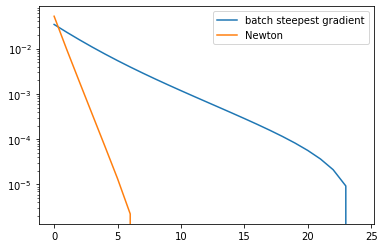

In [7]:
x_bsg = [i for i in range(len(j_bsg))]
x_N = [i for i in range(len(j_N))]
plt.semilogy(x_bsg, j_bsg, label='batch steepest gradient')
# plt.plot(x_bsg, j_bsg)
plt.semilogy(x_N, j_N, label='Newton')
# plt.plot(x_N, j_N)
plt.legend()
plt.show()

In [8]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [9]:
w_bsg_m = np.zeros([np.max(y_d5) + 1, len(x_d5[0])])
print(w_bsg_m)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [10]:
# batch steepest gradient method for multiclass version
w_bsg_m = np.zeros([np.max(y_d5) + 1, len(x_d5[0])])
j_bsg_m = []
times = 0
while 1:
    j_t = 0
    dj = np.zeros_like(w_bsg_m)
    temp = np.zeros(np.max(y_d5) + 1)
    w_bsg_m_temp = np.copy(w_bsg_m)
    for i in range(len(y_d4)):
        p = 0
        for j in range(len(temp)):
            temp[j] = np.exp(np.dot(w_bsg_m[j].T, x_d5[i]))
            p += np.exp(np.dot(w_bsg_m[j].T, x_d5[i]))
        # print(temp)
        temp /= p
        for j in range(len(temp)):
            if y_d5[i] == j:
                dj[j] -= (1 - temp[j])*x_d5[i]
            else:
                dj[j] += temp[j]*x_d5[i]
        j_t += -np.dot(w_bsg_m[y_d5[i]].T, x_d5[i]) + np.log(p)
    dj /= n
    dj += 2*w_bsg_m
    w_bsg_m -= 0.1*dj
    j_t /= n
    j_t += np.linalg.norm(w_bsg_m, ord=2)**2
    j_bsg_m.append(j_t)
    if np.all(w_bsg_m == w_bsg_m_temp) or (times > 1 and np.abs(j_bsg_m[-2] - j_bsg_m[-1]) < 1e-5):
        print(times)
        print(w_bsg_m)
        break
    times += 1

28
[[ 5.59347493e-02 -7.82830118e-02 -2.25675001e-02 -3.72822682e-05]
 [-1.55512203e-01  1.04738475e-02  3.45986127e-03 -9.13823240e-03]
 [ 9.95774536e-02  6.78091644e-02  1.91076388e-02  9.17551467e-03]]


In [11]:
j_bsg_m = j_bsg_m - j_bsg_m[-1]
# j_bsg_m = [np.linalg.det(j_bsg_m[i]) for i in range(len(j_bsg_m))]

In [12]:
# Netwon method for multiclass version
w_N_m = np.zeros([np.max(y_d5) + 1, len(x_d5[0])])
j_N_m = []
times = 0
while 1:
    j_t = 0
    dj = np.zeros_like(w_N_m)
    
    temp = np.zeros(np.max(y_d5) + 1)
    h = np.zeros([len(temp), len(temp)])
    w_N_m_temp = np.copy(w_N_m)
    for i in range(len(y_d4)):
        p = 0
        for j in range(len(temp)):
            temp[j] = np.exp(np.dot(w_bsg_m[j].T, x_d5[i]))
            p += np.exp(np.dot(w_bsg_m[j].T, x_d5[i]))
        # print(temp)
        temp /= p
        for j in range(len(temp)):
            if y_d5[i] == j:
                dj[j] -= (1 - temp[j])*x_d5[i]
            else:
                dj[j] += temp[j]*x_d5[i]
            for k in range(len(temp)):
                h[j][k] = (temp[j]*temp[k] - temp[k])*np.dot(x_d5[i], x_d5[i].T)
                # print(h[j][k])
            # print(temp[j]*(1 - temp[j])*np.dot(x_d5[i], x_d5[i].T))
            # h[j] += temp[j]*(temp[j] - 1)*np.dot(x_d5[i], x_d5[i].T)
        # print(temp[0]*(1 - temp[0])*x_d5[i])
        # h += temp*(1 - temp)*np.dot(x_d5[i], x_d5[i].T)
        j_t += -np.dot(w_N_m[y_d5[i]].T, x_d5[i]) + np.log(p)
    dj /= n
    dj += 2*w_N_m
    h /= n
    h += 2*np.identity(len(h))
    w_N_m -= np.dot(np.linalg.inv(h), dj)
    # w_N_m -= dj/h
    j_t /= n
    j_t += np.linalg.norm(w_bsg_m, ord=2)**2
    j_N_m.append(j_t)
    if np.all(w_N_m == w_N_m_temp) or (times > 1 and np.abs(j_N_m[-2] - j_N_m[-1]) < 1e-5):
    # if times >= 2 and j_t == j_N[-2]:
        print(times)
        print(w_N_m)
        break
    times += 1

2
[[ 5.59693317e-02 -7.83362109e-02 -2.25777277e-02 -3.46304430e-05]
 [-1.55615534e-01  1.04766671e-02  3.46158528e-03 -9.14221298e-03]
 [ 9.96462026e-02  6.78595436e-02  1.91161424e-02  9.17684345e-03]]


In [13]:
j_N_m = j_N_m - j_N_m[-1]
print(j_N_m)

[1.11319721e-01 2.82778573e-06 0.00000000e+00]


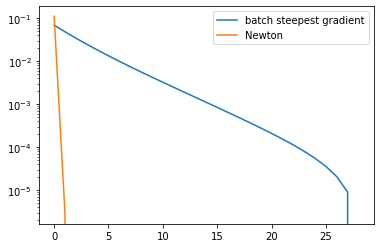

In [14]:
x_bsg_m = [i for i in range(len(j_bsg_m))]
x_N_m = [i for i in range(len(j_N_m))]
plt.semilogy(x_bsg_m, j_bsg_m, label='batch steepest gradient')
# plt.plot(x_bsg_m, j_bsg_m)
plt.semilogy(x_N_m, j_N_m, label='Newton')
# plt.plot(x_N_m, j_N_m)
plt.legend()
plt.show()